# Tools of Parameter Estimation: The PDF, CDF, and Quantile Function

## Exercises

1. Using the code example for plotting the PDF on page 127, plot the CDF and quantile functions. 
2. Returning to the task of measuring snowfall from Chapter 10, say you have the following measurements (in inches) of snowfall: 
   $$7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4$$
   What is your 99.9 percent confidence interval for the true value of snowfall? 
3. A child is going door to door selling candy bars. So far she has visited 30 houses and sold 10 candy bars. She will visit 40 more houses today. What is the 95 percent confidence interval for how many candy bars she will sell the rest of the day?

## Responses

### Exercise 1

> 1. Using the code example for plotting the PDF on page 127, plot the CDF and quantile functions. 

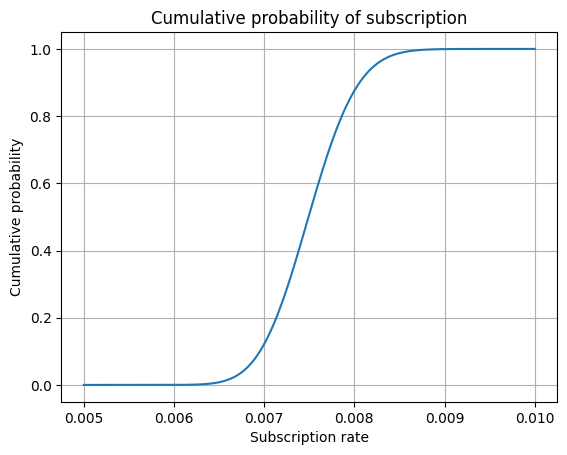

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

subscription_beta = beta(300, 40_000-300)

x = np.linspace(0.005, 0.01, 1000)

fig, ax = plt.subplots(1,1)
ax.plot(x, subscription_beta.cdf(x))
ax.set_title("Cumulative probability of subscription")
ax.set_ylabel("Cumulative probability")
ax.set_xlabel("Subscription rate")
ax.grid(True)
plt.show()

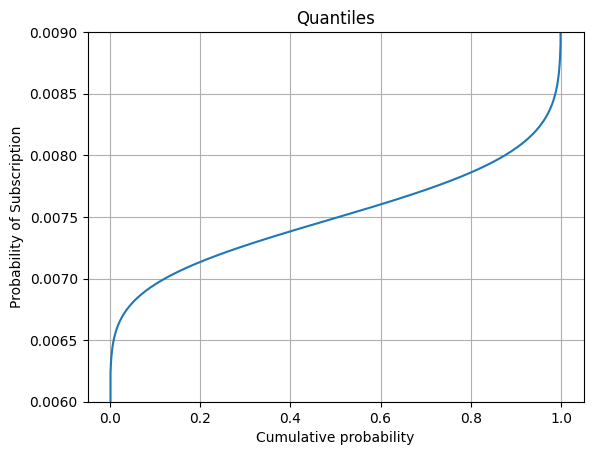

In [2]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

subscription_beta = beta(300, 40_000-300)

x = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(1,1)
ax.plot(x, beta.ppf(x, 300, 40_000-300))
ax.set_ybound(0.006, 0.009)
ax.set_title("Quantiles")
ax.set_ylabel("Probability of Subscription")
ax.set_xlabel("Cumulative probability")
ax.grid(True)
plt.show()

## Exercise 2

> 2. Returning to the task of measuring snowfall from Chapter 10, say you have the following measurements (in inches) of snowfall: 
>    $$7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4$$
>    What is your 99.9 percent confidence interval for the true value of snowfall?

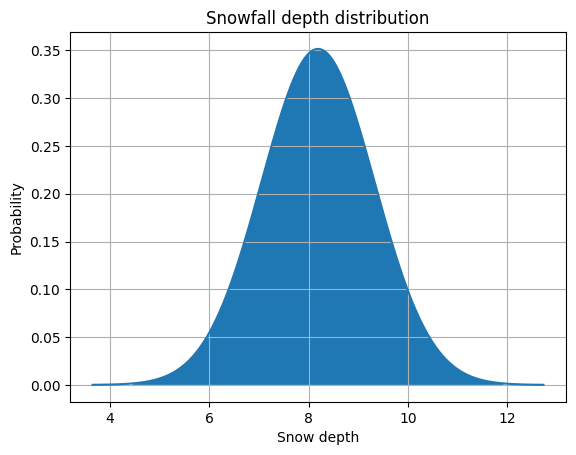

The 99.9% confidence interval is between 4.456 and 11.92


In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

snowfall_measurements = np.array([7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4], dtype=np.longdouble)

snowfall_norm_dist = norm(snowfall_measurements.mean(), snowfall_measurements.std(ddof=1))
confidence = 0.999
tail = (1-confidence)/2

lower_bound, upper_bound = snowfall_norm_dist.ppf(tail), snowfall_norm_dist.isf(tail)

fig, ax = plt.subplots(1,1)
x = np.linspace(snowfall_norm_dist.mean()- 4 * snowfall_norm_dist.std(), snowfall_norm_dist.mean() + 4 * snowfall_norm_dist.std(), 10_000)
ax.plot(x, snowfall_norm_dist.pdf(x))
ax.fill_between(x, snowfall_norm_dist.pdf(x), where= (x >= lower_bound) & (x <= upper_bound), label="99%")

ax.grid(True)
ax.set_title("Snowfall depth distribution")
ax.set_xlabel("Snow depth")
ax.set_ylabel("Probability")

plt.show()

print(f"The 99.9% confidence interval is between {lower_bound:.4} and {upper_bound:.4}")

> 3. A child is going door to door selling candy bars. So far she has visited 30 houses and sold 10 candy bars. She will visit 40 more houses today. What is the 95 percent confidence interval for how many candy bars she will sell the rest of the day?

The book probably expects this to be modeled as a beta distribution.  I don't actually like that because it implies the student can sell at most one candy bar per house.  But it is what I know how to do, so I will do it.

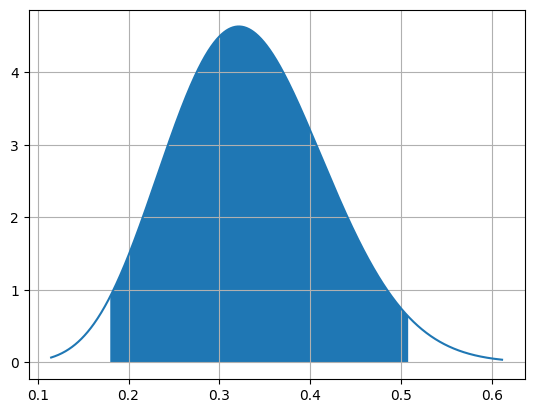

The probability of selling a candy bar at each house is between 0.18 and 0.51.
The student will visit 40 more houses today so she will, with 95% confidence, sell between 7 and 20 more candy bars.


In [4]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

houses_visited = 30
houses_sold = 10
houses_not_sold = houses_visited - houses_sold
confidence = 0.95
tail = (1-confidence)/2
candy_beta = beta(houses_sold, houses_not_sold)
candy_lower = candy_beta.ppf(tail)
candy_upper = candy_beta.isf(tail)

fig, ax = plt.subplots(1,1)
x = np.linspace(candy_beta.ppf(1-.999), candy_beta.ppf(.999), 1_000)
y = candy_beta.pdf(x)
ax.plot(x, y)
ax.fill_between(x, 0, y, where= (x >= candy_lower) & (x <= candy_upper))
ax.grid(True)
plt.show()

print(f"The probability of selling a candy bar at each house is between {candy_lower:.2} and {candy_upper:.2}.")
print(f"The student will visit 40 more houses today so she will, with 95% confidence, sell between {round(40*candy_lower):n} and {round(40*candy_upper):n} more candy bars.")